# Classification

This notebook is heavily inspired by Andre Guernon work, that can be found here: https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb

## Setup

In [1]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from time import time

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## The MNIST Dataset

We will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

We will use `sklearn.datasets.fetch_openml()` to fetch dataset from openml by name or dataset id.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(
    'mnist_784',
    version=1,
    as_frame=False # we want the dataset as NumPy ndarray not as a pandas DataFrame
)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Let's import the dataset, inputs and labels:

In [11]:
X, y = mnist['data'], mnist['target']

In [12]:
type(X)

numpy.ndarray

In [13]:
X.shape # 28x28 = 784

(70000, 784)

# If we print out the values for these columns, we see the edges - which are mainly 'white' (0) 

In [14]:
df = pd.DataFrame(X)
df[:10]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# However, choosing a pixel in the middle of the image - shows the range of colour (greyscale)

In [15]:
df[:10][456]

0      0.0
1    230.0
2    177.0
3      0.0
4    235.0
5     78.0
6      0.0
7      0.0
8      0.0
9    247.0
Name: 456, dtype: float64

# Y, on the other hand, is a one-dimensional array

In [16]:
y.shape

(70000,)

In [17]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [18]:
y[78]

'1'

In [19]:
y[26362]

'8'

`X` contains 70,000 images each of them contains 784 features, because each of them is a 28x28 picture. Each feature is a pixel intensity encoded in an 8-bit scale: from 0 (white) to 255 (black)

Let's display one or more images using matplotlib `imshow()`

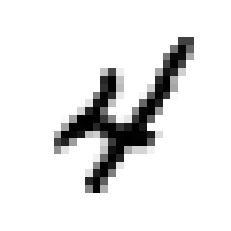

In [20]:
digit = X[9]
digit_img = digit.reshape(28, 28)

plt.imshow(digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [21]:
y[9]

'4'

The label is a string. We must convert it to a number for it to work on a Machine Learning algorithm.

In [22]:
y = y.astype(np.uint8)

In [23]:
y[9]

4

In [24]:
def show_digits(instances, images_per_row=10, **opts):
    """
    Utility function to display the MNIST digits on a grid
    """
    # the size of our images (28x28)
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # convert images from 1-D to 2-D arrays
    images = [instance.reshape(size, size) for instance in instances]
    # compute how many rows you need in the grid
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    # create empty "dummy" images to fill potential remaining slots at the end of the grid
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    # concatenate all the images in a single grid image
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    # plot the grid image
    plt.imshow(image, cmap = mpl.cm.binary, **opts)
    plt.axis("off")

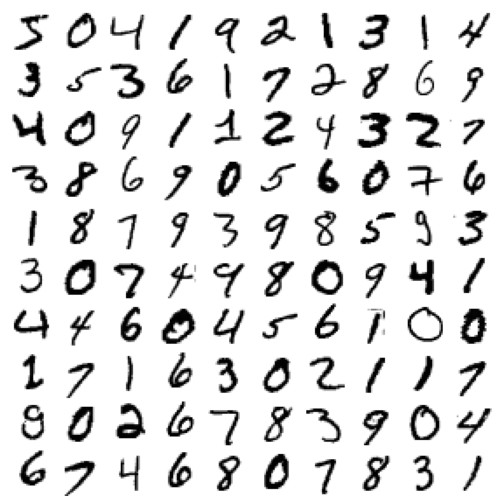

In [25]:
plt.figure(figsize=(9,9))
example_images = X[:100]
show_digits(example_images, images_per_row=10)
plt.show()

## 4.1 Split the dataset in training and test set

Well set aside 10,000 samples for testing purposes. The data set is already shuffled for us so we can just take the last 10,000 samples for our test set.

In [26]:
# use slicing to create training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## 4.1 Training a binary classifier

As a first goal, we will train a binary classifier, reducing our classes (classifications/categories) from 10 (values: 0-9) to 2 (first example: either 8 or not, and Ex1: even or odd).

Let's define two set of labels for the training and test set, named `y_train_8` and `y_test_8`. These must contain the value `True` whenever the original label is an 8, `False` otherwise

In [28]:
# Implemented using boolean masking
y_train_8 = y_train == 8
y_test_8 = y_test == 8

In [29]:
y_train_8[:20], y_train[:20]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False]),
 array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
       dtype=uint8))

**Exercise 1**: Let's suppose we want to implement a binary classfier to classify even vs odd digits. Define two set of labels for the training and test set, named `y_train_even` and `y_test_even`. These must contain the value `True` whenever the original label is a digit representing an even number, `False` if it's an odd number

In [30]:
# Write your solution here:

y_train_even = y_train % 2 == 0
y_test_even = y_test % 2 == 0


In [31]:
y_train_even = (y_train + 1) % 2

In [32]:
y_train_even[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=uint8)

In [33]:
y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

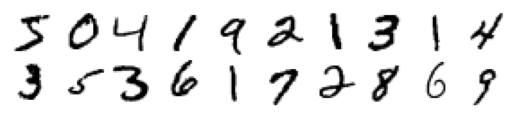

In [34]:
plt.figure(figsize=(9,9))
example_images = X[:20]
show_digits(example_images, images_per_row=10)
plt.show()

##### Logistic regression classifier 

## (NOTE: This is for the Y_TRAIN_8 - NOT even and odd)

We can train a logistic regression classifier by either using `sklearn.linear_model.SGDClassifier` with `loss` argument set as `log`.

In [35]:
from sklearn.linear_model import LogisticRegression
lin_cl = LogisticRegression()
lin_cl.fit(X_train, y_train_8)

/Users/nick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn.linear_model import SGDClassifier

import time
start_time = time.time()

sgd_cl = SGDClassifier(random_state=77, loss="log")
sgd_cl.fit(X_train, y_train_8)

print("--- %s seconds ---" % (time.time() - start_time))

--- 20.3095281124115 seconds ---


In [40]:
sgd_cl.predict(X_train[:20])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False])

In [41]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [42]:
y[17]

8

It has correctly predicted the "8" at index 17. However this belongs to the data it used during the training phase.
We need a validation set to fairly evaluate the performance of our logistic regression classifier.

### 4.1.1 Performance Measures: measuring Accuracy Using Cross-Validation

We'll now use `cross_val_score()` to assess the accuracy of our Classifier `sgd_cl` on (X_train, y_train), using 3-fold cross-validation.

In [43]:
from sklearn.model_selection import cross_val_score

import time
start_time = time.time()

scores = cross_val_score(
    sgd_cl, X_train, y_train_8, cv=3, scoring="accuracy"
)
print("--- %s seconds ---" % (time.time() - start_time))
#%time

--- 29.40115785598755 seconds ---


In [45]:
scores

array([0.93855, 0.93255, 0.84255])

In [46]:
np.mean(scores)

0.90455

Our accuracy is 93 % in the first two runs and 84% in the third. The classifier looks very performant, but is it really the case?

**Exercise 2:** Use `cross_val_score()` to assess the accuracy of an SGD classifier implementing an online support vector machine (SVM), on (X_train, y_train_8), using 5-fold cross-validation.

It is more or less accurate than the SGD classifier implementing logistic regression?

# Limited the dataset to a few thousand to reduce time to train

In [47]:
# Write your solution here
from sklearn.svm import SVC
svm_cl = SVC(gamma='auto')
#start = time()
#svm_cl.fit(X_train[:1000], y_train[:1000])
#print('Duration: {} s'.format(time() - start))
#svm_cl.predict(X_train[:10])


import time
start_time = time.time()

from sklearn.model_selection import cross_val_score
start = time.time()
scores = cross_val_score(
    svm_cl, # model we want to train
    X_train[:10000], # features
    y_train_8[:10000], # labels
    scoring='accuracy', # accuracy
    cv=5 #cross val checks (should be 5)
)
print("--- %s seconds ---" % (time.time() - start_time))


--- 159.4141070842743 seconds ---


## More consistency between validation checks - doesn't drop off

In [48]:
scores

array([0.906 , 0.9055, 0.9055, 0.9055, 0.9055])

NOTE: Sometimes you need more control over cross-validation than what is offered out of the box with `cross_val_score()`. In the example in the cell below we are going to use the `StratifiedKFold` class to implement cross-validation

### <span style="color:red">**NOTE: do not run this in the class, it takes way too much time.**</span>

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

import time
start_time = time.time()

for train_index, val_index in skfolds.split(X_train, y_train_8):
    # make a clone (copy) of our Stochastic Gradient Classifier
    clone_sgd_cl = clone(sgd_cl) 
    
    # get training and validation set for current CV iteration
    X_train_f = X_train[train_index]
    X_val_f = X_train[val_index]
    y_train_f = y_train[train_index]
    y_val_f = y_train[val_index]
    
    # train the SGD classifier
    clone_sgd_cl.fit(X_train_f, y_train_f)
    # make predictions on validation set
    y_pred = clone_sgd_cl.predict(X_val_f)
    # count number of correct predictions
    n_correct = sum(y_pred == y_val_f)
    # print out accuracy score
    print(n_correct / len(y_val_f))
    
print("--- %s seconds ---" % (time.time() - start_time))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

Let's go back to our SGD classifier `sgd_cl` trained as a logistic regressor. Our accuracy was 93 % in the first two runs and 84% in the third. The classifier looked very performant, but is it really the case?

Let's create a dummy classifier that never predicts that a digit is an "8". It will just always return `False` (i.e. `0`) as a predicted label.

In [49]:
from sklearn.base import BaseEstimator
class Never8Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_8_clf = Never8Classifier()

Use `cross_val_score()` to assess the accuracy of our Classifier `never_8_clf` on (X_train, y_train), using 3-fold cross-validation. Which accuracy do you expect?

In [50]:
# Write your solution here

cross_val_score(
    never_8_clf, 
    X_train, 
    y_train_8, 
    cv=3, 
    scoring="accuracy"
)


array([0.9039 , 0.9031 , 0.90045])

It has over 90% accuracy! This is simply because only about 10% of the images are 8s, so if you always guess that an image is not a 8, you will be right about 90% of the time. 

Accuracy _per_ _se_ is not the preferred metrics when dealing with classifiers. This is even more true in this case, as we are dealing with a skewed dataset.

### 4.1.2 Performance Measures: Confusion Matrix

![confusion](https://miro.medium.com/v2/resize:fit:1334/format:webp/1*3yGLac6F4mTENnj5dBNvNQ.jpeg)


Left to right: 
<p> TP:  "this is 8" and it is actually an 8 
<p> FP:  "this is 8" when it is <b>not actually</b> an 8 <b>    => TYPE 1 ERROR </b>

<p> FN:  "this is not an 8" when <b>it is actually</b> an 8 <b>    => TYPE 2 ERROR </b>
<p> TN:  "this is not an 8" when it is not actually an 8

A more reliable way to measure the performance of a classifier is to look at the so-called _confusion matrix_. The aim is to quantify how many times members of a class C1 are misclassified as members of the class C2. To do that we will use the `cross_value_predict()` (rather the CV scores, it returns the predictions) function together with the `confusion_matrix()` metric.

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(
    sgd_cl,
    X_train,
    y_train_8,
    cv=3
)
y_train_pred

array([False, False, False, ..., False, False,  True])

In [53]:
confusion_matrix(y_train_8, y_train_pred)

array([[50274,  3875],
       [ 1852,  3999]])

The ideal perfect classifier would have true positives and true negatives only. In this case the confusion matrix would have zero values outside the main diagonal.

In [54]:
y_train_perfect_pred = y_train_8
confusion_matrix(
    y_train_8, 
    y_train_perfect_pred
)

array([[54149,     0],
       [    0,  5851]])

#### 4.1.3 Precision, Recall and Harmonic mean (F1 score)

* Precision or Positive Predicted Value: $$ PPV = \frac{TP}{TP + FP} $$
* Recall or TPR or Sensitivity $$ TPR  = \frac{TP}{TP + FN} $$
* Harmonic Mean of Precision and Recall $$ F1 = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}} = \frac{TP}{TP + \frac{FN+FP}{2}} $$

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
ps = precision_score(y_train_8, y_train_pred)
rs = recall_score(y_train_8, y_train_pred)
f1s = f1_score(y_train_8, y_train_pred)
ps, rs, f1s

(0.5078740157480315, 0.6834729106135703, 0.5827322404371583)

Now our classifier looks way worse than before! It has a 50% precision and 68% recall. 

Notice that F1 tends to favour models that have similar precision and recall. But in some context you might prefer a higher precision, while in others a higher recall, depending on the task.

There is however a trade-off between precision and recall.

A classifier such as our `SGDClassifier` performs the classification task by computing a score based on a "decision function". If a score is greater than a given threshold value, the instance is labeled with the positive class, otherwise with the negative class (from the theory of Logistic regression, if you remember, an estimated probabilty of class "1" greater than 0.5 means that we assign the value to class "1"). Raising this threshold will reduce the number of FP, thus increasing the precision. However, it will also increase the number of FN thus reducing the recall score.

Let's try to manipulate the `SGDClassifier`'s threshold manually, using the classifier's `.decision_function()` method

In [56]:
y_scores = sgd_cl.decision_function(X_train[:20])
y_scores

array([ -6004.06437255,  -4627.92299992,  -9386.52192365,   -565.379327  ,
        -4448.21399887,   -810.18121937,  -1870.60495763,   -398.465083  ,
        -1754.65161801,  -1952.75837913,  -2652.48419663,    998.62692833,
       -13189.1250276 ,  -5654.82281211,   -814.11597091,  -2811.97829008,
        -3299.87374082,   2336.10363749,  -2216.20131501,  -2398.72241464])

In [57]:
threshold = 0
y_pred_on_scores = y_scores > threshold
y_pred_on_scores

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False])

In [58]:
threshold = 500
y_pred_on_scores = y_scores > threshold
y_pred_on_scores

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False])

Raising the threshold increases the number of FN, decreasing the recall. How can we than determine the right threshold value for our task? First let's use `cross_val_predict()`using the 'decision_function' method on our entire training set, and then let's use the computed score together with the `precision_recall_curve()` to compute precision and recall for all the possible threshold values.

In [59]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(
    sgd_cl,
    X_train,
    y_train_8,
    cv=3,
    method='decision_function'
)
precisions, recalls, thresholds = precision_recall_curve(
    y_train_8, y_scores
)

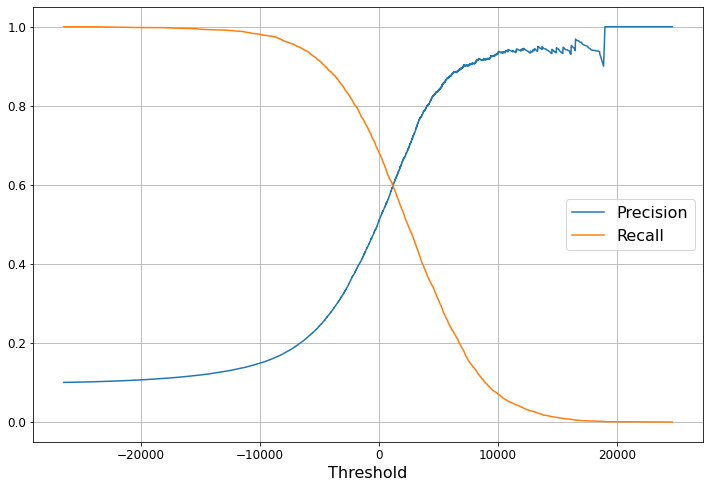

In [60]:
import seaborn as sns

def plot_precision_and_recall_vs_threshold(
    precisions, recalls, thresholds
):
    sns.lineplot(x=thresholds, y=precisions[:-1])

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=thresholds, y=precisions[:-1], ax=ax)
sns.lineplot(x=thresholds, y=recalls[:-1], ax=ax)
plt.legend(['Precision', 'Recall'], loc="center right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)        
plt.grid(True)                                      
plt.show()

In [61]:
# Let's find the threshold for which we can achieve a 90% precision
threshold_90_prec = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_prec

7105.009210982933

We can now compute the predictions from the scores using this new threshold.

In [62]:
y_train_pred_90 = (y_scores >= threshold_90_prec)

In [63]:
precision_score(y_train_8, y_train_pred_90) 

0.9005059021922428

In [64]:
recall_score(y_train_8, y_train_pred_90)

0.182532900358913

Now we have reached a 90% precision, at the expense of recall, which is now 18%!

# Week 5

### 4.1.3 Performance Measures: The ROC curve

Another tool that can be used to evaluate a classifier performance is the receiver-operating characteristic (ROC) curve. The ROC curves plots the true positive rate (TPR, i.e. recall) vs the false positive rate (FPR). 

Specificity or TNR: $$ TNR  = \frac{TN}{TN + FP} $$

True positive rate: $$TPR = \frac{TP}{TP + FN}$$

False positive rate: $$FPR = 1 - TNR$$

The ROC curve plots  `sensitivity` (TPR) against `1-specificity` (FPR) 

In [76]:
from sklearn.metrics import roc_curve

import time
start_time = time.time()

y_scores_sgd = cross_val_predict(
    sgd_cl, # our SGD classifier trained to fit a Logistic Regressor
    X_train,
    y_train_8,
    cv=3,
    method='decision_function'
)

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores_sgd)

print("--- %s seconds ---" % (time.time() - start_time))


--- 29.50356101989746 seconds ---


In [77]:
fpr.shape

(6466,)

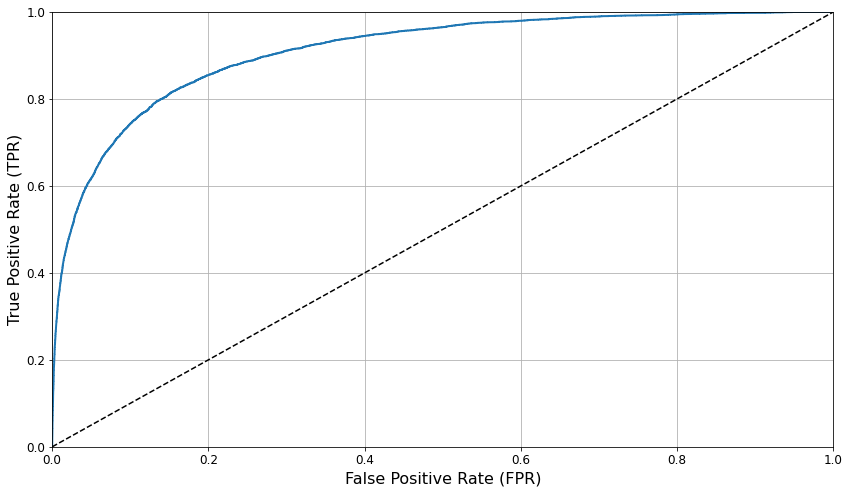

In [78]:
plt.figure(figsize=(14, 8))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.grid(True)
plot_roc_curve(fpr, tpr)
plt.show()


You can measure the _area under the curve_ (AUC) if you want to compare the performance of different classifiers. 

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores_sgd)

0.9102127159789787

As a general rule, prefer the Precision/Recall curve if the positive class is uncommon or if you worry more about the false positives rather than the false negatives. In the other scenarios, prefer the ROC curve.

#### ROC AUC for KNNs and Random Forests

Let's try two different classifiers: a K-Nearest Neighbours classifier and a Random Forest classifier.

The K-Nearest Neighbours algorithm checks the K closest (i.e. most similar instances) in the training set and assigns as predicted class for the new instance the most represented class in the neighbourhood. 

The Random Forest algorithm is an ensemble method which trains a number of decision tree classifiers on various sub-samples of the training set and uses averaging techniques to improve the predictive accuracy and control over-fitting.

We will see more on Decision Trees and Ensemble methods in the next weeks.

**NOTE:** K-Nearest Neighbour and Random Forest classifiers do not have a `decision_function()` method that returns the predicted scores for each instance in cross validation. They do have, however, a `predict_proba()` method that returns an array containing a row per instance and a column per class. This array contains the predicted probability that each instance belongs to a class. This can be used to draw ROC curves in lieu of `decision_function()`. Scikit-learn classifiers usually implement either one or the other method so you need to check their API to find out the one you need to use.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

import time
start_time = time.time()

kn_cl = KNeighborsClassifier(n_neighbors=9)
y_probs_kn = cross_val_predict(
    kn_cl,
    X_train,
    y_train_8,
    cv=3, 
    method='predict_proba'
)
print("--- %s seconds ---" % (time.time() - start_time))

--- 70.691153049469 seconds ---


In [71]:
from sklearn.ensemble import RandomForestClassifier

import time
start_time = time.time()

forest_cl = RandomForestClassifier(
    n_estimators=100, # a "forest" of 100 decision trees
    random_state=77
)
y_probs_forest = cross_val_predict(
    forest_cl,
    X_train,
    y_train_8,
    cv=3,
    method="predict_proba"
)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.891940116882324 seconds ---


In [72]:
y_probs_forest

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.31, 0.69]])

In [74]:
# Nearest neighbours scores
y_scores_kn = y_probs_kn[:, 1]    # score = proba of positive class
fpr_kn, tpr_kn, thresholds_kn = roc_curve(y_train_8, y_scores_kn)
# Random Forests scores
y_scores_forest = y_probs_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8,y_scores_forest)

Use the scores computed above for `sgd_cl`, `kn_cl`, `forest_cl` to plot out the three ROC curves on the same plot. You can use, if you wish the `plot_roc_curve()` function defined above. Afterward compute the area under the curve for `mnb_cl` and `forest_cl`. Which is the best and the worst classifier?

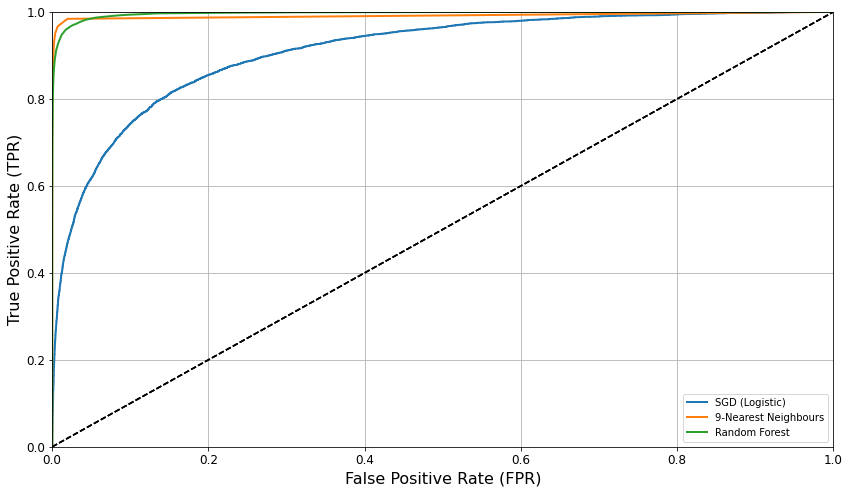

In [75]:
plt.figure(figsize=(14, 8))
plot_roc_curve(fpr, tpr, "SGD (Logistic)")
plot_roc_curve(fpr_kn, tpr_kn, "9-Nearest Neighbours")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_8, y_scores_kn)

In [ ]:
roc_auc_score(y_train_8, y_scores_forest)

**Exercise 4:** Try and train a few more classifiers and plot their ROC curves. Which of the them has the better area under the curve? Which one has the "steepest" ROC curve?

Hint 1: you can also train similar models but exploring the hyperparameter space.

Hint2: You could use the yellowbrick library (https://www.scikit-yb.org/en/latest/index.html) to get better visualization of the ROC curves. See https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html. You can install yellowbrick using Anaconda Navigator (make sure to use the "conda-forge" channel) or by running `!conda install -c conda-forge -y yellowbrick` in a notebook cell.

In [ ]:
# Write your solution here

# niave bayes?

from sklearn.naive_bayes import MultinomialNB
mnb_cl = MultinomialNB()
y_probs_mnb = cross_val_predict(
    mnb_cl,
    X_train,
    y_train_8,
    cv=3, 
    method='predict_proba'
)


In [ ]:
# Naive Bayes scores
y_scores_mnb = y_probs_mnb[:, 1]    # score = proba of positive class
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_train_8, y_scores_mnb)
# Random Forests scores
y_scores_forest = y_probs_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8,y_scores_forest)
# plt.plot(fpr, tpr, "b:", label="SGD")

In [ ]:
# Write your solution here:
plt.figure(figsize=(14, 8))
plot_roc_curve(fpr, tpr, "SGD (SVM)")
plot_roc_curve(fpr_mnb, tpr_mnb, "Naive Bayes")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_8, y_scores_mnb)

In [ ]:
roc_auc_score(y_train_8, y_scores_forest)

## 4.2 Multiclass Classification

When you need to distinguish more than two classes, you have a multiclass classification problem. ML learning algorthms, solve the multiclass problem mainly in three ways:
* they support multi-class classification natively (e.g. SGD Classifier, K-Nearest Neighbour, Naive Bayes, Random Forests)
* they are binary classifiers in one-vs-the-rest strategy (OvR) ($N$ classifiers are needed for $N$ classes)
* they are binary classifiers in one-vs-one-strategy (OvO) ($N\times (N-1)/2$ classifiers are needed for $N$ classes). Each classifier has to be trained only on the subset of the training set for the two classes that it must distinguish.

(Offline) Support Vector Machines are generally trained using the OvO approach. Let's see an example (we will only use a subset of the dataset)

In [ ]:
from time import time
from sklearn.svm import SVC
svm_cl = SVC(gamma='auto')
start = time()
svm_cl.fit(X_train[:1000], y_train[:1000])
print('Duration: {} s'.format(time() - start))
svm_cl.predict(X_train[:10])

### <span style="color:red">**NOTE: do not run this in the class, it takes several hours to run, depending on your hardware specs. (on a MacBook Pro 2019 took 6 hours 55 min)**</span>

In [ ]:
# Try and train it on the whole training set
svm_cl = SVC(gamma='auto')
start = time()
svm_cl.fit(X_train, y_train)
print('Duration: {} s'.format(time() - start))
svm_cl.predict(X_train[:10])

In [ ]:
scores = svm_cl.decision_function(X_train[:10])
scores

In [ ]:
np.argmax(scores, axis=1)

In [ ]:
svm_cl.classes_

In [ ]:
start = time()
forest_cl = RandomForestClassifier(n_estimators=100, random_state=77)
scores = cross_val_score(forest_cl, X_train, y_train, cv=3, scoring='accuracy')
print('Execution time {} s'.format(time() - start))

In [ ]:
start = time()
sgd_cl = SGDClassifier(random_state=77, tol=1e-3, max_iter=2000, n_jobs=-1)
scores = cross_val_score(sgd_cl, X_train, y_train, cv=3, scoring='accuracy')
print('Execution time {} s'.format(time() - start))

Our `sgd_cl` should be initialized with a higher max_iter (eg 2000), otherwise the algorithm might not converge. This is not done in the live demo because the execution time becomes considerable.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

### <span style="color:red">**NOTE: do not run this in the class, it takes way too much time.**</span>

In [ ]:
start = time()
scores = cross_val_score(sgd_cl, X_train_scaled, y_train, cv=3, scoring='accuracy')
print('Execution time {} s'.format(time() - start))
scores

### 4.2.1 Model Evaluation

In a proper machine learning problem solving approach you would pre-process the input data (as shown in Class 2) and then try a few ML algorithms, also exploring the parameter space using `GridSearchCV` or `RandomizedSearchCV`.
Hypothesising that you have done so, and that you have a good model, you will then want to evaluate its performance.
Let's look a the confusion matrix, as a first step.

In [ ]:
# NOTE: this cell should take about 3 minutes to run on a 2019 MacBookPro. Performance may vary
# depending on hardware
sgd_cl = SGDClassifier(random_state=77, tol=1e-3, max_iter=2000, n_jobs=-1)
start = time()
y_train_pred = cross_val_predict(sgd_cl, X_train_scaled, y_train, cv=3)
c_mat = confusion_matrix(y_train, y_train_pred)
print('Execution time {} s'.format(time() - start))

In [ ]:
plt.matshow(c_mat, cmap=plt.cm.gray)
plt.show()

We can evaluate the performance of the predictor (precision, recall and F1 score) for each class, using the summary function `classification_report()`

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)
print(report)

Let’s plot the errors. Firstly, we divide each value by the number of images in the corresponding class so that we compare error rates rather than absolute numbers of errors. Then we fill the values along the diagonal with zeros to keep only the classification errors.

In [ ]:
row_sums = c_mat.sum(axis=1, keepdims=True)
norm_c_mat = c_mat / row_sums
np.fill_diagonal(norm_c_mat, 0)
plt.matshow(norm_c_mat, cmap=plt.cm.gray)
plt.show()

Now, we can better see which type of errors our classifier makes. Which are these?

## 4.3 Multilabel and Multioutput Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_prime = np.in1d(y_train, [2, 3, 5, 7])
y_train_odd = y_train % 2 == 1
y_multilabel = np.c_[y_train_prime, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict(X_train[:10])

In [ ]:
y_train[:10], y_multilabel[:10, 0], y_multilabel[:10, 1]

### <span style="color:red">**NOTE: do not run this in the class, it takes way too much time.**</span>

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")